In [1]:
import numpy as np
import skimage as sk
import skimage.io as skio
from skimage import feature
from scipy.ndimage import convolve
from skimage.filters import sobel
import glob
import cv2
import os
import matplotlib
import matplotlib.pyplot as plt
#Required libraries imported

In [2]:
def align(img1, img2,use_edge=False):  
    img1_crop = img1[int(0.1 * len(img1)):-int(0.1 * len(img1)),
              int(0.1 * len(img1[0])):-int(0.1 * len(img1[0]))]
    img2_crop = img2[int(0.1 * len(img2)):-int(0.1 * len(img2)),
              int(0.1 * len(img2[0])):-int(0.1 * len(img2[0]))]  #cropped images for better solution
    max_score = -float('inf')
    shift = [0, 0]
    method='SSD'
    displacement_x=(-15, 15)
    displacement_y=(-15, 15) 
    for i in range(displacement_x[0], displacement_x[1] + 1): #different permutations of dipslacement is trying.
        for j in range(displacement_y[0], displacement_y[1] + 1):
            temp_score = score(np.roll(img1_crop, (i, j), (0, 1)), img2_crop)
            if temp_score > max_score:
                max_score = temp_score
                shift = [i, j]
    return np.roll(img1, shift, (0, 1)), np.array(shift)
# With this align function, the best displacement vector will be found for input images.

In [3]:
def score(img1, img2, use_edge=False):
    method='SSD'
    if use_edge:
        img1 = np.abs(sobel(img1))
        img2 = np.abs(sobel(img2))
    if method == 'SSD':
        return -np.sum(np.sum((img1 - img2)**2)) 
    elif method == 'NCC':
        img1 = np.ndarray.flatten(img1)
        img2 = np.ndarray.flatten(img2)
        return np.dot(img1 / np.linalg.norm(img1), img2 / np.linalg.norm(img2))
# this function calculates the similarity score between img and img2 with two methods(SSD and NCC)

In [4]:
def process_image(img):
    # reading image
    im = skio.imread(img)
    #img=np.asarray(im)   
    im = sk.img_as_float(im) # convert this image to float because of saving the memory
        
    # height of parts is equal to 1/3 of image height
    height = np.floor(im.shape[0] / 3.0).astype(np.int)

    # channels are seperated
    blue = im[:height]
    green = im[height: 2*height]
    red = im[2*height: 3*height]

    # create a color image
    ag ,g_shift = align(green, blue) #applied the displacement shifts
    ar , r_shift= align(red, blue)
    im_out = np.dstack([ar, ag, blue])
    # display the image
    skio.imshow(im_out) 
    skio.show()
#This function takes an image as an input. It seperates this image to its channels and apply displacement shifts on them.

In [5]:
def load_images(folder):
    images = {}
    files = glob.glob(folder+"/*.jpg")
    for file in files:
        image = cv2.imread(os.path.join(folder,os.path.basename(file)),cv2.IMREAD_GRAYSCALE)
        if image is not None:
            images[os.path.basename(file)] = image
    return images
# To get all of the images from the pictures folder, I write a function to do it. This function takes an input that is folder name includes input images.

In [6]:
folder = "images"
images = load_images(folder) # images are loading

This for loop provides that each image can be processed.

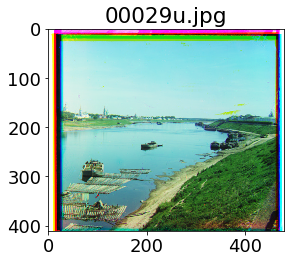

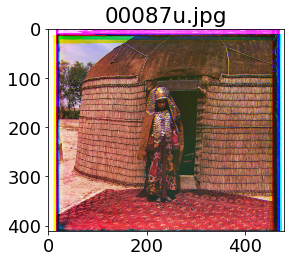

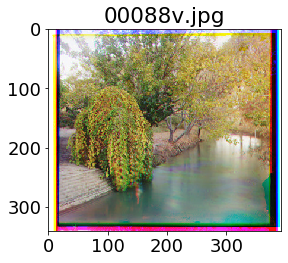

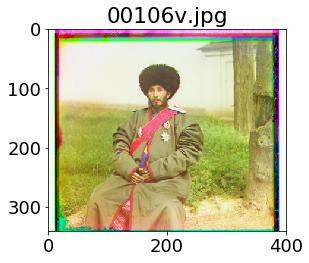

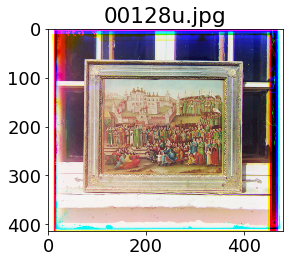

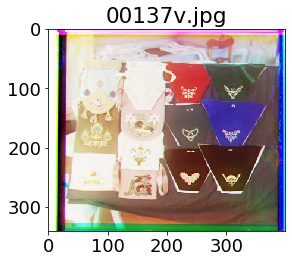

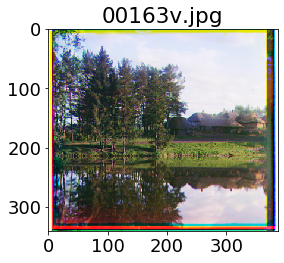

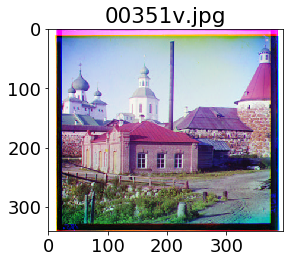

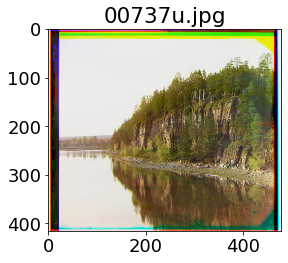

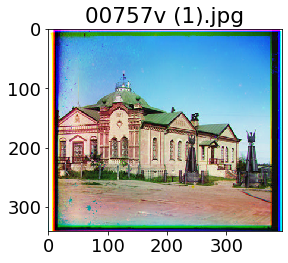

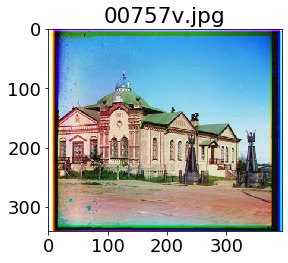

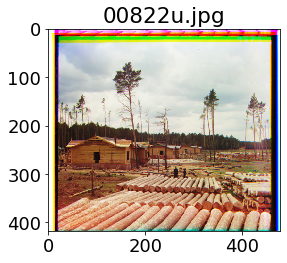

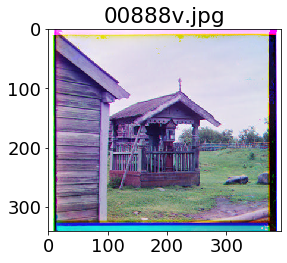

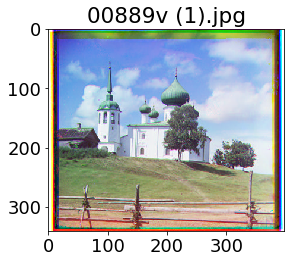

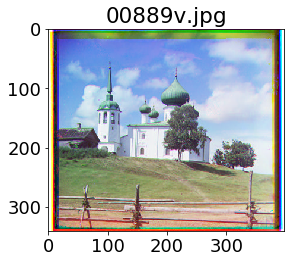

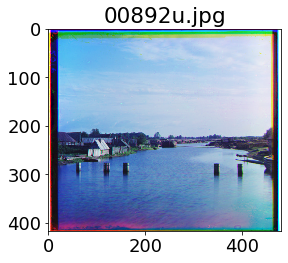

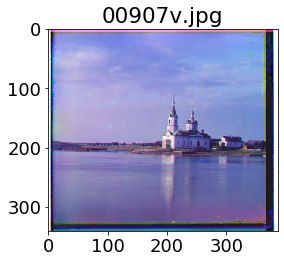

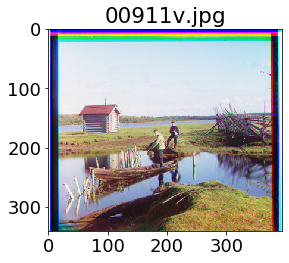

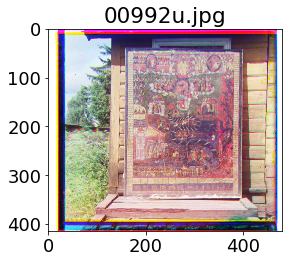

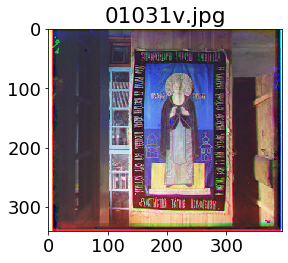

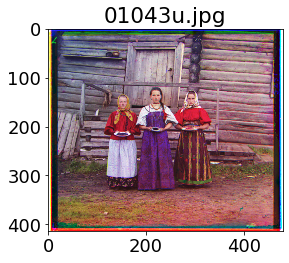

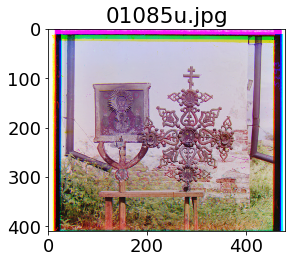

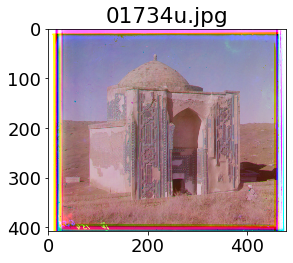

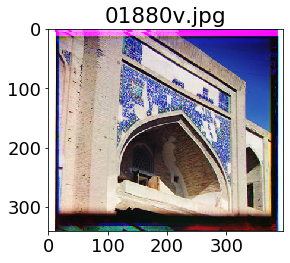

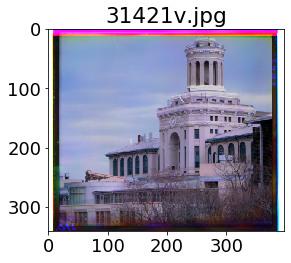

In [7]:
for name, image in images.items():
    matplotlib.rcParams['font.size'] = 18
    plt.title(name)
    image_modified=process_image('images/'+name) 
    #filename=name+"_modified"
    #directory = r'C:\Users\Lenovo\Desktop\Assignment 1'
    #io.imsave(directory, image_modified)
    #save_image(name,"_color",image_modified, ds_folder + "/output/")
